The goal of this notebook is to look at relationships between two quantitative variables and be able to describe that relationship.


In [2]:
# import pandas, numpy and matplotlib libraries
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from matplotlib import colors


### Graphical Summary: Scatterplot

First we will import some data.

Note that we have pull lots of data from the following directory: 
https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/

(FYI clicking on that link won't show you anything since I've not made the directory public)

We will be using the penguins data again.

In [3]:
penguins = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/penguins.csv", na_values=['NA'])
# remove rows with missing data
penguins.dropna(inplace=True)
penguins.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


How many variables/features are in these data?  How do you know?



Next we make a scatterplot for the Penguins data for two variables *flipper_length_mm* and *body_mass_g*.

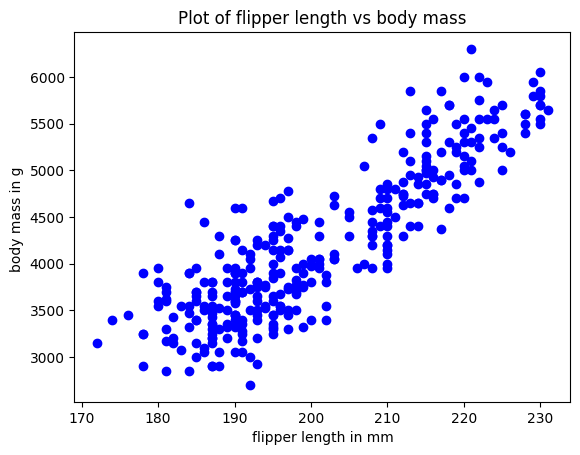

In [4]:
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')

# Show the plot
plt.show()

How would you describe the relationship in the scatter plot we just made?

The relationship between body mass and flipper length of these penguins seems to be linear, positive and moderately strong.

Let's return to the Ames Housing data and look at some relationships from those data.

In [5]:
# read in the data to dataframe called ames
ames = pd.read_csv("https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ames_house_prices.csv", na_values=['?'])
# replace the ? in the data with NaN for missing values
ames.replace([' ?'],np.nan)
# show information about the dataframe
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Here's a scatterplot for Garage Area vs Sale Price.

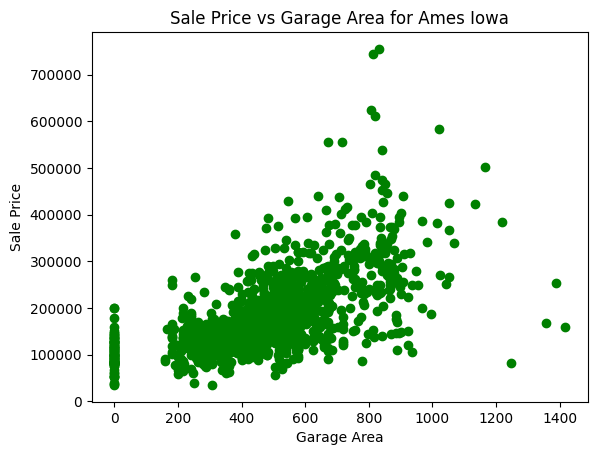

In [6]:
plt.scatter( ames['GarageArea'],ames['SalePrice'], color="green")

# Add labels and title
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Garage Area for Ames Iowa')

# Show the plot
plt.show()

The relationship here is positive, non-linear, and moderate to weak.

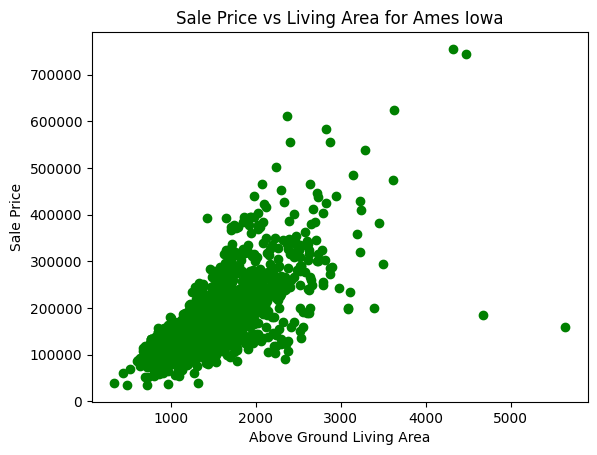

In [7]:
plt.scatter( ames['GrLivArea'],ames['SalePrice'], color="green")

# Add labels and title
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Living Area for Ames Iowa')

# Show the plot
plt.show()

The relationship in the above scatterplot between living area and sales price seems to be positive, linear (though maybe slightly non-linear) and moderate with a couple of outliers in the bottom right with very large living area but relatively small sales prices.

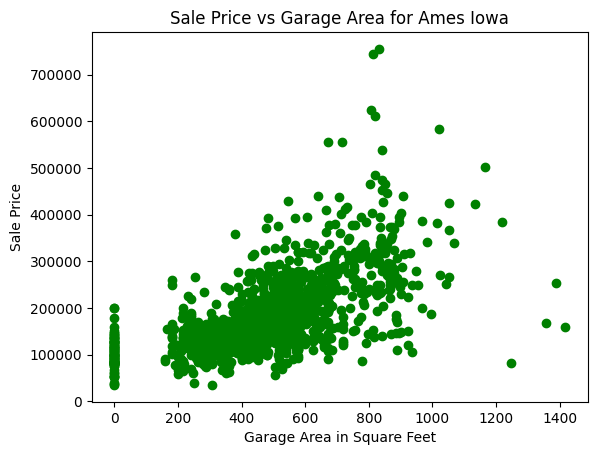

In [8]:
plt.scatter(ames['GarageArea'], ames['SalePrice'], color="green")

# Add labels and title
plt.xlabel('Garage Area in Square Feet')
plt.ylabel('Sale Price')
plt.title('Sale Price vs Garage Area for Ames Iowa')

# Show the plot
plt.show()

The above graph seems to show a non-linear, positive, moderate relationship wtih some outliers for the relationship between the Garage Area of a home and the Sale Price of a home.

### Linear Regression

Linear regression is a modelling approach that assumes a linear shape to a relationship. 

We are going to _start_ with what is known as a simple linear regression and the word simple comes from the fact that there is just a single predictor/explanatory variable/feature.  A linear regression fits a line, sometimes called a line of best fit, to the $x$ and $y$ points in the data.  

[100.       100.040008 100.080016 ... 299.919984 299.959992 300.      ]
[-856.7627     -854.75616669 -852.74963339 ... 9169.88423339 9171.89076669
 9173.8973    ]


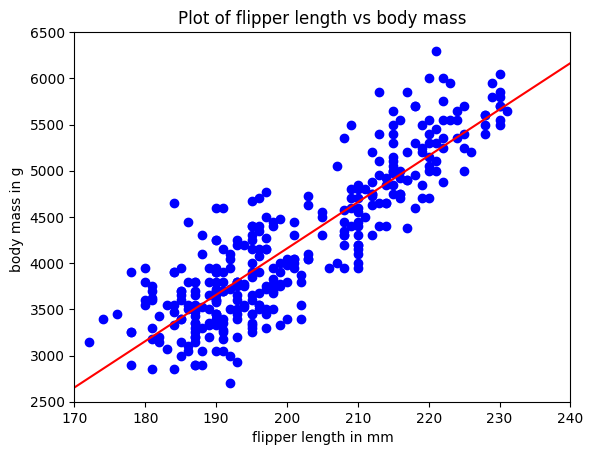

In [16]:
plt.scatter( penguins['flipper_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('flipper length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of flipper length vs body mass')

#create an array of value from 100 to 300
xseq = np.linspace(100, 300, num=5000)
print(xseq)

# Add regression line to plot
plt.plot(xseq, -5872.0927 + 50.1533*xseq , color='red')
print(-5872.0927 + 50.1533*xseq)

# Set the x-axis and the y-axis limits
plt.xlim(170, 240)
plt.ylim(2500,6500)
# Show plot
plt.show()

The line that we added above has the following equation $\hat{y} = -5872.0927 + 50.1533*X$.  So our y-intercept is estimated to be $-5872.1$ and the slope is estimated to be $50.2$. 

We interpret the y-intercept to be the predicted body mass of a penguin who has a flipper length of zero mm.  Note that this does not make much sense as we'll never have a real penguin with a flipper length of zero.  

An estimated slope of $50.2$ means that for every additional millimeter of flipper length, we predict that the body mass of a penguin will increase by $50.2$ grams.

In the next cell we cover show how to get the estimates for the slope and the intercept.

In [10]:


#define response variable
y = penguins['body_mass_g']

#define predictor variables
x = penguins['flipper_length_mm']

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (beta_1) and intercept (beta_0)
# deg=1 means linear fit (i.e. polynomial of degree 1)
beta_1, beta_0 = np.polyfit(x, y, deg=1)

print(beta_0)
print(beta_1)



-5872.092682842823
50.15326594224113


#### Tasks

1.  Make a scatterplot of penguin *bill_length_mm* and *body_mass_g* and describe the relationship

2. Fit a regression line to predict *body_mass_g* from *bill_length_mm* using the Penguin data and interpret the estimated intercept and slope.

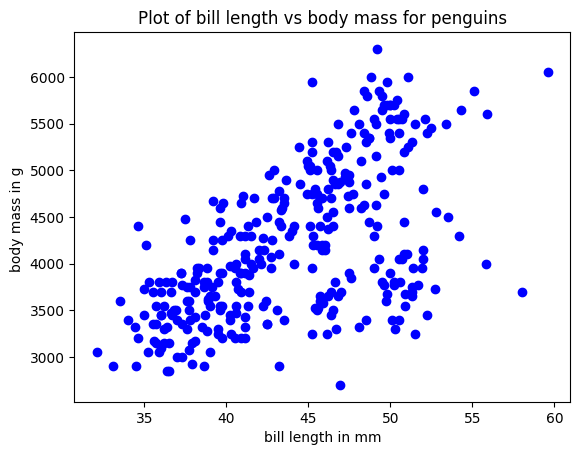

In [11]:
plt.scatter( penguins['bill_length_mm'],penguins['body_mass_g'], color="blue")

# Add labels and title
plt.xlabel('bill length in mm')
plt.ylabel('body mass in g ')
plt.title('Plot of bill length vs body mass for penguins')
plt.show()

The relationship here is weak, positive and linear.

In [12]:
#define response variable
y = penguins['body_mass_g']

#define predictor variables
x = penguins['bill_length_mm']

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (beta_1) and intercept (beta_0)
# deg=1 means linear fit (i.e. polynomial of degree 1)
beta_1, beta_0 = np.polyfit(x, y, deg=1)

print(beta_0)
print(beta_1)

388.84515876027433
86.7917596475555


Interpretation here:  For the estimated y-intercept, 388.8, we can say that for a penguin with a bill length of 0 mm that we would predict their body mass to be 388.8 grams.

For the estimated slope, 86.8, our interpretation is that for each additional mm of bill length then we will predict that the body mass of a penguin will increase by 86.8 g.